# ASTR596: Fundamentals of Data Science
## Week 1 In class exercise solutions - Part 1
#### Gautham Narayan <gsn@illinois.edu>

This notebook steps through the in class exercises during Week 1.
You are not required to do things this way, and indeed by the end of the semester, you'll probably have your own favorite ways to do things. That's totally OK.

In [1]:
# we use the numpy scipy and friends stack so much that it's worth just having things in the namespace
# you can do that with %pylab here
# The things that start with % are called `magics`
# There's a lot of them, and you can see the list here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Slide 13: Use pandas to load the ascii spectrum and plot it. 

First, just look at the file's content with `head`

In [2]:
!head ../data/01/tns_2019vju_2019-11-27_16-34-37_FTS_FLOYDS-S_Global_SN_Project.ascii

3.800403808593749091e+03 6.100867034464609387e-16
3.802143537282942816e+03 6.070640134346247645e-16
3.803883265972136542e+03 6.731292481282303772e-16
3.805622994661330267e+03 6.020142677008906429e-16
3.807362723350523993e+03 6.140257772281078590e-16
3.809102452039717718e+03 5.331759000775336543e-16
3.810842180728911444e+03 4.805814009210276037e-16
3.812581909418105170e+03 5.323927651782378503e-16
3.814321638107298895e+03 5.584263228120987712e-16
3.816061366796492621e+03 5.636695626347212971e-16


OK, so there's no column names, but two columns with wavelength and flux, both of which are floating point numbers.

In [3]:
import pandas as pd

In [4]:
# let's load the file
spec = pd.read_csv('../data/01/tns_2019vju_2019-11-27_16-34-37_FTS_FLOYDS-S_Global_SN_Project.ascii',\
                   delimiter=' ',names=['wave','flux'])

In [5]:
# you can examine that the contents read in OK by just entering the variable name in may cases.
spec

,wave,flux
0,3800.403809,6.100867e-16
1,3802.143537,6.070640e-16
2,3803.883266,6.731292e-16
3,3805.622995,6.020143e-16
4,3807.362723,6.140258e-16
...,...,...
3560,9993.837942,4.419781e-16
3561,9995.577671,4.135841e-16
3562,9997.317400,3.735814e-16
3563,9999.057128,3.411612e-16


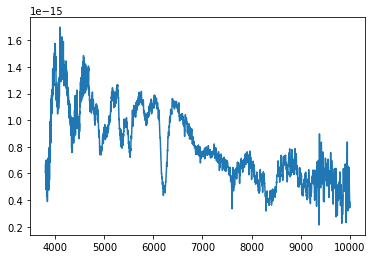

In [6]:
plot(spec['wave'], spec['flux'])

### Slide 13: Use astropy.io.fits to load a .fits image and display it with matplotlib

In [7]:
# it's sometimes annoying to type out long package names, but you can shorten them like this
import astropy.io.fits as afits

In [8]:
img = afits.open('../data/01/wdd7.071117_0328.073_6.sw.fits')

FITS images are a "loosely defined" standard used for a lot of astronomical data
There's a primer on FITS data here: https://fits.gsfc.nasa.gov/fits_primer.html
Basically, the files can have a header and some data, either in the form of a table or an image.

In [9]:
# let's look at the image object first - it should show up as a python list with one element
img

In [10]:
# Let's look at the header first
img[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                   16 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 4160 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                 1100 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
BSCALE  =             1.000000 /                                                
BZERO   =         32768.000000 /                                                
EQUINOX =            2000.0000 / Mean equinox                                   
RADECSYS= 'FK5     '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =      3.820150417E+

If you parse that, you can see that there's two axes - 4160x1100
There's a lot of additional information telling you about the project that took the image, how the image was taken, how it was processed etc.

In [11]:
# Let's look at the image data
img_data = img[0].data

In [12]:
img_data

array([[1486, 1486, 1486, ..., 1486, 1486, 1486],
       [1486, 1486, 1486, ..., 1486, 1486, 1486],
       [1486, 1486, 1486, ..., 1486, 1486, 1486],
       ...,
       [1486, 1486, 1486, ..., 1486, 1486, 1486],
       [1486, 1486, 1486, ..., 1486, 1486, 1486],
       [1486, 1486, 1486, ..., 1486, 1486, 1486]], dtype=uint16)

In [13]:
img_data.shape

(1100, 4160)

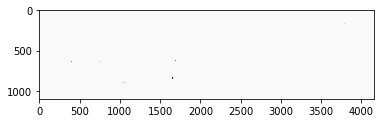

In [14]:
imshow(img_data, cmap='Greys')

In [15]:
# That can be a bit tricky to see anything with, so we can scale the data
# you can scale the raw array values directly, but astropy has a number of helpful visualization functions
# We will use the ZScale one
from astropy.visualization import ZScaleInterval

In [16]:
zscaler = ZScaleInterval()
vmin, vmax = zscaler.get_limits(img_data)

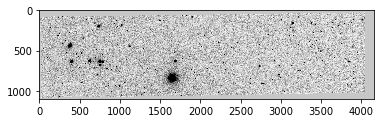

In [17]:
imshow(img_data, vmin=vmin, vmax=vmax, cmap='Greys')

Much better. You can also open the FITS file at the command line with `ds9`. Similarly you can look at the header or do specific operations using the WCSTools package which we installed in Week 0. In particular, `gethead` and `imhead` are useful to look at the header.